<a href="https://colab.research.google.com/github/omyllymaki/mean-shift-clustering/blob/main/mean_shift_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mean shift clustering

In [29]:
import torch
import matplotlib.pyplot as plt

In [30]:
torch.manual_seed(7)

In [35]:


# Number of points per cluster
num_points_per_cluster = 200

# Number of clusters
num_clusters = 5

# Initialize an empty list to store points
points = []

# Generate points for each cluster
for _ in range(num_clusters):

    x_center = torch.randn(1)*10
    y_center = torch.randn(1)*10

    # Generate random x and y coordinates from a Gaussian distribution
    x_coordinates = torch.randn(num_points_per_cluster) + x_center
    y_coordinates = torch.randn(num_points_per_cluster) + y_center

    # Create a 2D tensor for the cluster and add it to the list
    cluster_points = torch.stack((x_coordinates, y_coordinates), dim=1)
    points.append(cluster_points)

# Concatenate all cluster points into a single tensor
points = torch.cat(points)

# Print the generated points
print(points.shape)



torch.Size([1000, 2])


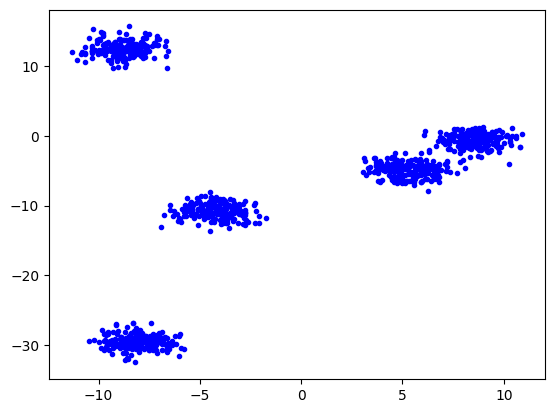

In [36]:
plt.plot(points[:,0], points[:,1], "b.")